In [56]:
import pandas as pd
import numpy as np
import re

In [57]:
df = pd.read_csv('deceptive-opinion.csv')
df.sample(15)

,deceptive,hotel,polarity,source,text
524,deceptive,homewood,positive,MTurk,"Very nice hotel, better than expected. The hot..."
1234,deceptive,conrad,negative,MTurk,"For our anniversary this year, my wife and I s..."
508,deceptive,homewood,positive,MTurk,Downtown Chicago has a multitude of available ...
759,deceptive,palmer,positive,MTurk,A hotel made for royalty. Decked out to the to...
1489,deceptive,hilton,negative,MTurk,We stayed at the Schicago Hilton for 4 days an...
289,truthful,james,positive,TripAdvisor,The James Hotel met and exceeded our expectati...
427,deceptive,conrad,positive,MTurk,Located right in the heart of downtown Chicago...
1103,truthful,james,negative,Web,Very disapointed in the service and quality of...
110,truthful,homewood,positive,TripAdvisor,My sister and I went to Chicago for a weekend ...
348,truthful,amalfi,positive,TripAdvisor,I have stayed at the Amalfi Hotel before and i...


In [58]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [59]:
df.nunique()  # Unique Values in Columns:

deceptive       2
hotel          20
polarity        2
source          3
text         1596
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [61]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


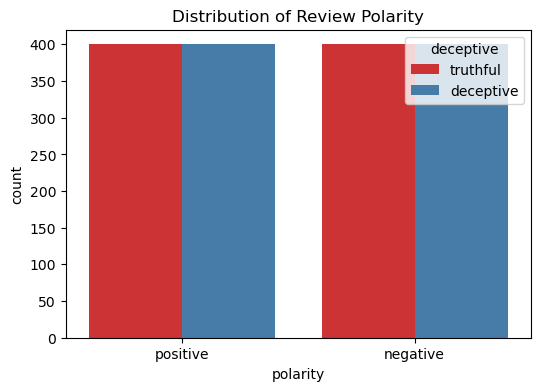

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the distribution of the 'polarity' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='polarity', hue='deceptive', palette='Set1')
plt.title('Distribution of Review Polarity')
plt.show()

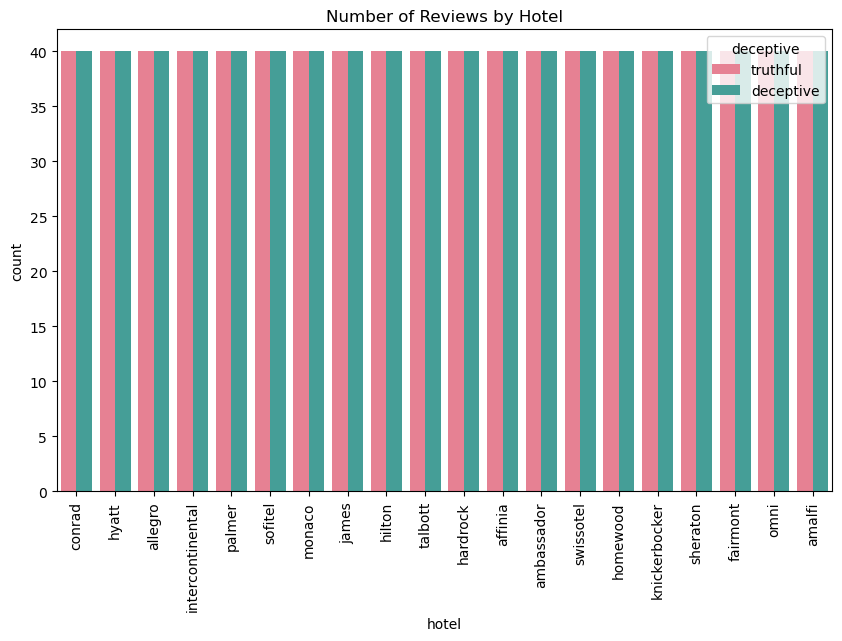

In [63]:

# Visualizing the distribution of reviews by hotel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='deceptive', palette='husl', order=df['hotel'].value_counts().index)
plt.title('Number of Reviews by Hotel')
plt.xticks(rotation=90)
plt.show()


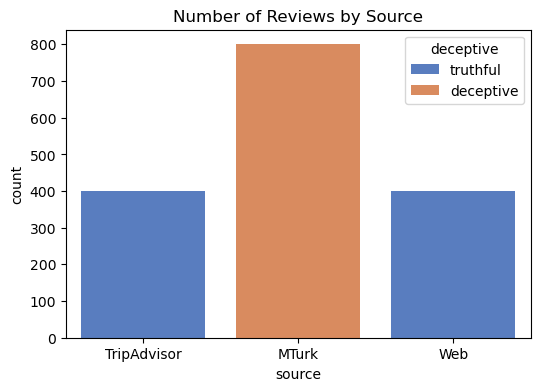

In [64]:
# Visualizing the distribution of reviews by source
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='source', hue='deceptive', palette='muted')
plt.title('Number of Reviews by Source')
plt.show()

In [65]:
# Checking the most common text entries (sample)
print("\nMost common review text:")
print(df['text'].value_counts().head(3))


Most common review text:
text
The Omni was chosen for it's location whichworked out perfectly. The bedding was wondeful and everything seemed fairly clean ...until...I sat down in the tub...there was BLACK MOLD in the soap holder, in the cracks on the walls between the tile, all under the tile overhang above the tub and completely around the toilet bowl. Needless to say I drained the tub and took a shower...I really don't care for showers. Oh yes...the toilet leaked as well...The staff were very helpful but I was disappointed. I travel extensively and don't think I will return. we needed color copies for a business meeting and their printer was broken, so the man in the business center took the jump drive to another part of the hotel, printed the presentation and delivered it to our room. They try! We booked online for a weekend package and got a room on the 10th floor with a view of the windows of another building...but we weren't there too much.\n                                    

In [66]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define stopwords
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation
    text = re.sub('[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords_set]
    
    # POS Tagging (optional: select specific POS tags)
    tagged_words = nltk.pos_tag(words)
    # Filter out words by POS (for example, you could only keep nouns and verbs)
    filtered_words = [word for word, tag in tagged_words if tag in ['NN', 'VB', 'JJ']]  # Keep Nouns, Verbs, and Adjectives
    return ' '.join(filtered_words)

# Apply text cleaning
df['text'] = df['text'].apply(clean_text)

<>:14: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Preet\AppData\Local\Temp\ipykernel_6188\2253280017.py:14: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Classifier: Logistic Regression
Accuracy: 86.5625
Confusion Matrix 
 [[138  14]
 [ 29 139]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



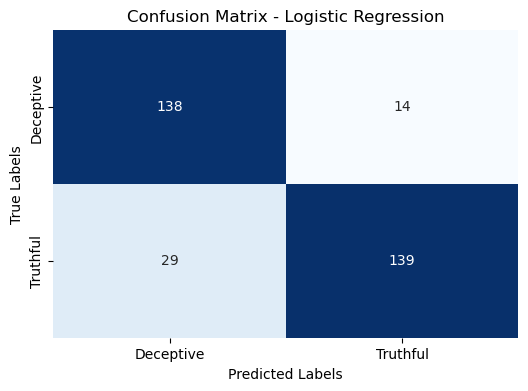

**************************************************
Classifier: Naive Bayes
Accuracy: 83.125
Confusion Matrix 
 [[143   9]
 [ 45 123]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.76      0.94      0.84       152
    truthful       0.93      0.73      0.82       168

    accuracy                           0.83       320
   macro avg       0.85      0.84      0.83       320
weighted avg       0.85      0.83      0.83       320



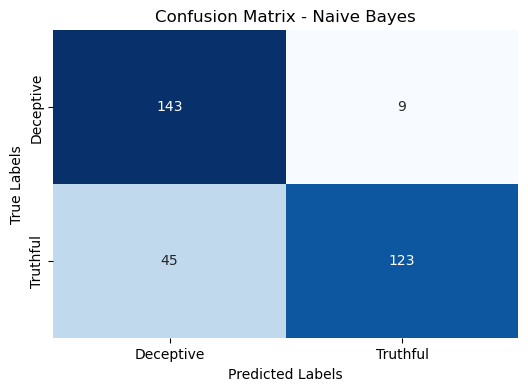

**************************************************
Classifier: k-Nearest Neighbors (k=5)
Accuracy: 71.875
Confusion Matrix 
 [[135  17]
 [ 73  95]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.65      0.89      0.75       152
    truthful       0.85      0.57      0.68       168

    accuracy                           0.72       320
   macro avg       0.75      0.73      0.71       320
weighted avg       0.75      0.72      0.71       320



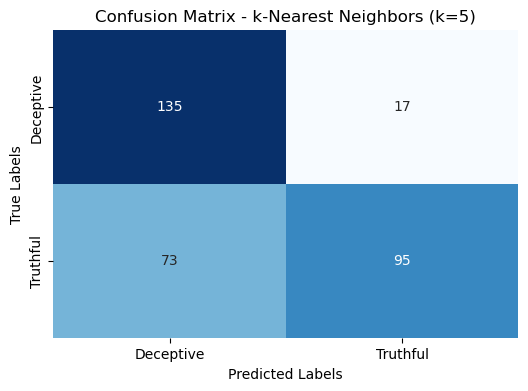

**************************************************
Classifier: Decision Tree
Accuracy: 60.3125
Confusion Matrix 
 [[103  49]
 [ 78  90]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.57      0.68      0.62       152
    truthful       0.65      0.54      0.59       168

    accuracy                           0.60       320
   macro avg       0.61      0.61      0.60       320
weighted avg       0.61      0.60      0.60       320



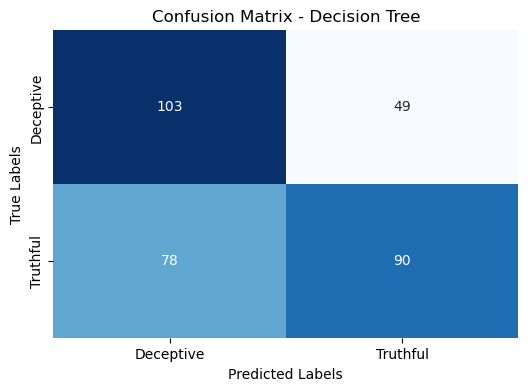

**************************************************
Classifier: Random Forest
Accuracy: 80.0
Confusion Matrix 
 [[132  20]
 [ 44 124]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.75      0.87      0.80       152
    truthful       0.86      0.74      0.79       168

    accuracy                           0.80       320
   macro avg       0.81      0.80      0.80       320
weighted avg       0.81      0.80      0.80       320



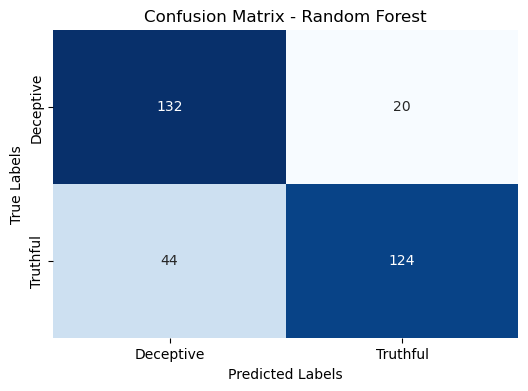

**************************************************
Classifier: Support Vector Machine
Accuracy: 85.0
Confusion Matrix 
 [[134  18]
 [ 30 138]]
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.82      0.88      0.85       152
    truthful       0.88      0.82      0.85       168

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



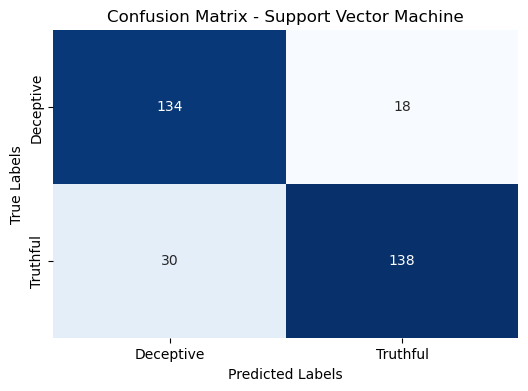

**************************************************


In [68]:
from sklearn.metrics import confusion_matrix

# Training and evaluating each classifier with a color-coded confusion matrix
for name, classifier in classifiers.items():
    print(f"Classifier: {name}")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print("Accuracy:", accuracy * 100)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix \n", conf_matrix)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Visualizing the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Deceptive', 'Truthful'], 
                yticklabels=['Deceptive', 'Truthful'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    print("*" * 50)


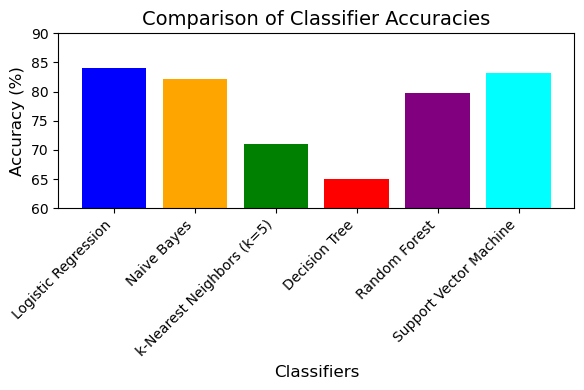

In [69]:
classifiers = [
    "Logistic Regression", "Naive Bayes", "k-Nearest Neighbors (k=5)",
    "Decision Tree", "Random Forest", "Support Vector Machine"
]
accuracies = [84.0625, 82.1875, 70.9375, 65.0, 79.6875, 83.125]

# Plotting
plt.figure(figsize=(6,4))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

# Adding labels and title
plt.xlabel("Classifiers", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Comparison of Classifier Accuracies", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(60, 90)  # Setting y-axis limits for better visibility

# Displaying the chart
plt.tight_layout()
plt.show()

In [91]:
# import nltk
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Ensure necessary NLTK data is downloaded
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# # Define stopwords
# stopwords_set = set(stopwords.words('english'))

# def clean_text(text):
#     # Remove punctuation
#     text = re.sub(r'[^\w\s]', '', text)  # Fixed: Added raw string with r
#     # Convert to lowercase
#     text = text.lower()
#     # Tokenize the text
#     words = word_tokenize(text)
#     # Remove stopwords
#     words = [word for word in words if word not in stopwords_set]
    
#     # POS Tagging and filtering (e.g., nouns, verbs, adjectives)
#     tagged_words = nltk.pos_tag(words)
#     filtered_words = [word for word, tag in tagged_words if tag in ['NN', 'VB', 'JJ']]
#     return ' '.join(filtered_words)

# def predict_review(review, vectorizer, classifier):
#     """
#     Predict whether a review is deceptive or truthful.
    
#     Parameters:
#         review (str): The input review text.
#         vectorizer (TfidfVectorizer): The trained TF-IDF vectorizer.
#         classifier (trained model): The trained classifier model.
    
#     Returns:
#         str: "Deceptive" or "Truthful".
#     """
#     # Clean the input review
#     cleaned_review = clean_text(review)
    
#     # Vectorize the cleaned review
#     review_vectorized = vectorizer.transform([cleaned_review])
    
#     # Predict the label
#     prediction = classifier.predict(review_vectorized)
    
#     # Map the prediction to a label
#     label = "Truthful" if prediction[0] == 1 else "Deceptive"
#     return label

# # Example usage with trained models
# input_review = input("Enter a review to classify: ")
# result = predict_review(input_review, vectorizer, classifiers[0])  # Pass the Logistic Regression model
# print(f"The review is classified as: {result}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


AttributeError: 'csr_matrix' object has no attribute 'lower'